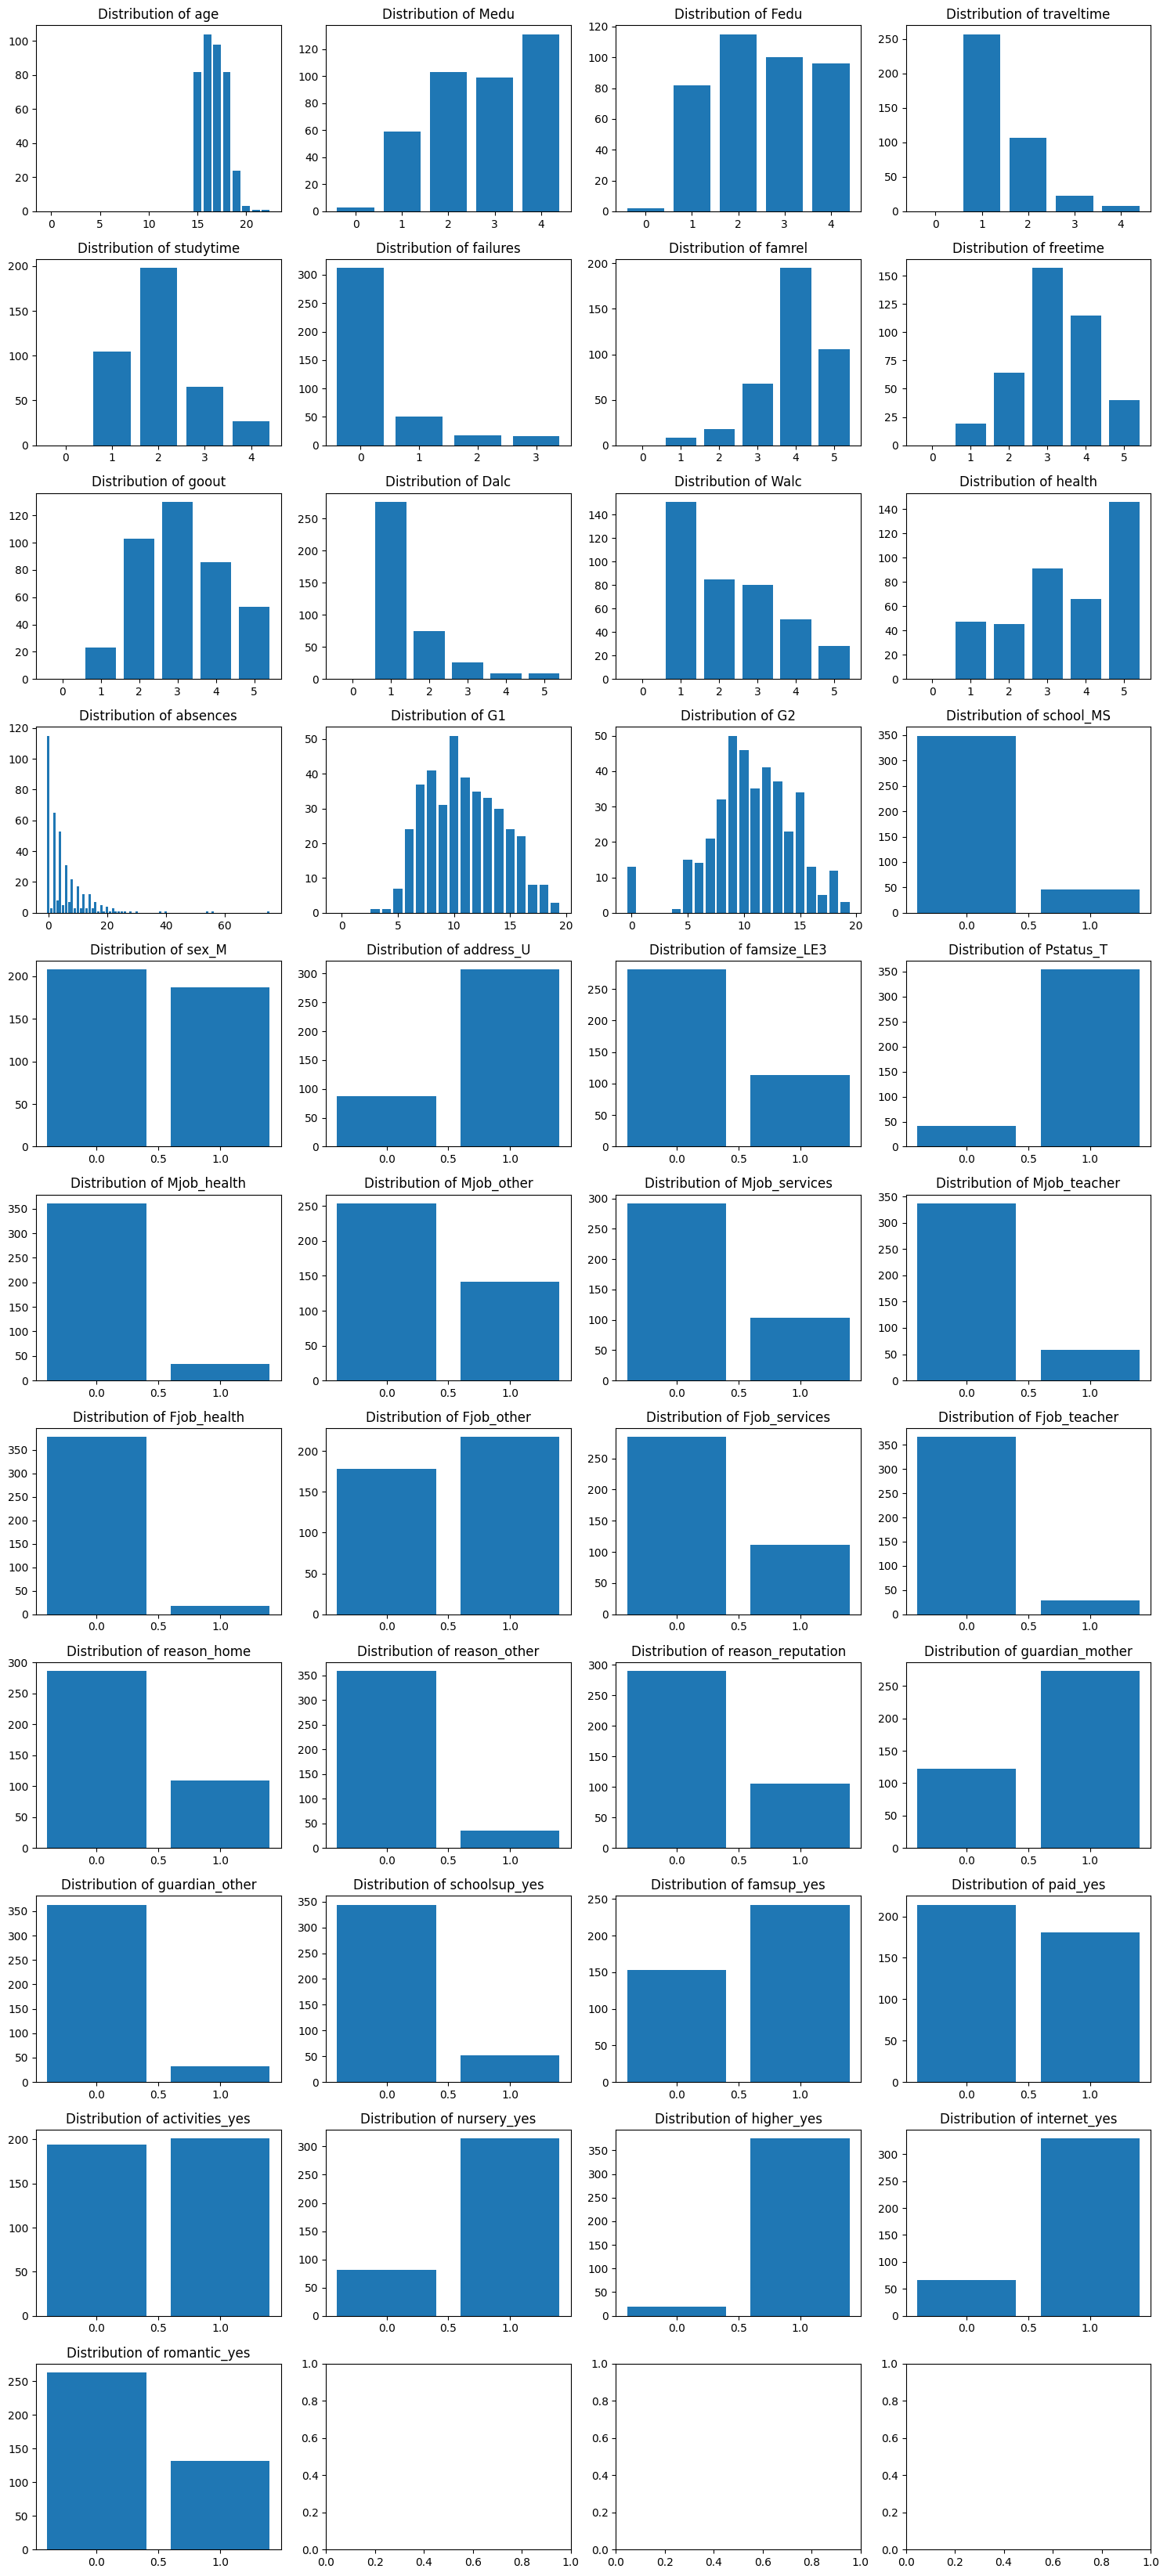

In [111]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Convert categorical columns to numeric using one-hot encoding
data_numeric = pd.get_dummies(data.drop(columns=["G3"]), drop_first=True)  # Exclude "G3" for now

# Inspect the DataFrame to identify problematic columns
# Convert each column to numeric, forcing conversion to handle edge cases
for col in data_numeric.columns:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Fill any NaN values that result from conversion with 0 or another appropriate value
data_numeric = data_numeric.fillna(0)

# Ensure all columns are now of numeric type
data_numeric = data_numeric.astype(float)

# Convert the numeric DataFrame to a PyTorch tensor
data_tensor = torch.tensor(data_numeric.values, dtype=torch.float)

# Remove the target variable "G3" from the list of columns
cols_to_plot = [col for col in data_numeric.columns]  # Use the new numeric columns

# Create subplots
num_cols = len(cols_to_plot)
cols_per_subplot = 4
num_subplots = (num_cols - 1) // cols_per_subplot + 1
fig, axs = plt.subplots(num_subplots, cols_per_subplot, figsize=(15, num_subplots * 3))

# Iterate over the columns and create the distribution plots
for i, col in enumerate(cols_to_plot):
    ax = axs[i // cols_per_subplot, i % cols_per_subplot]

    # Plot value counts for each column
    value_counts = torch.bincount(torch.tensor(data_numeric[col].values, dtype=torch.int64))  # Convert to tensor and use torch's bincount for counts
    ax.bar(range(len(value_counts)), value_counts.numpy())

    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()


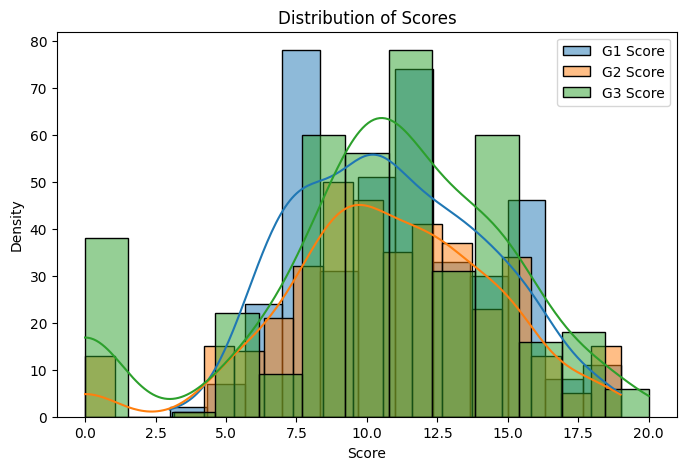

In [112]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student-mat.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Convert relevant columns (G1, G2, G3) to PyTorch tensors
G1_tensor = torch.tensor(data['G1'].values, dtype=torch.float)
G2_tensor = torch.tensor(data['G2'].values, dtype=torch.float)
G3_tensor = torch.tensor(data['G3'].values, dtype=torch.float)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Distribution plot of G1, G2, and G3 using tensors converted back to NumPy arrays
sns.histplot(G1_tensor.numpy(), kde=True, label='G1 Score', ax=ax)
sns.histplot(G2_tensor.numpy(), kde=True, label='G2 Score', ax=ax)
sns.histplot(G3_tensor.numpy(), kde=True, label='G3 Score', ax=ax)

# Set axis labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of Scores')

# Add a legend
ax.legend()

# Display the combined distribution plot
plt.show()


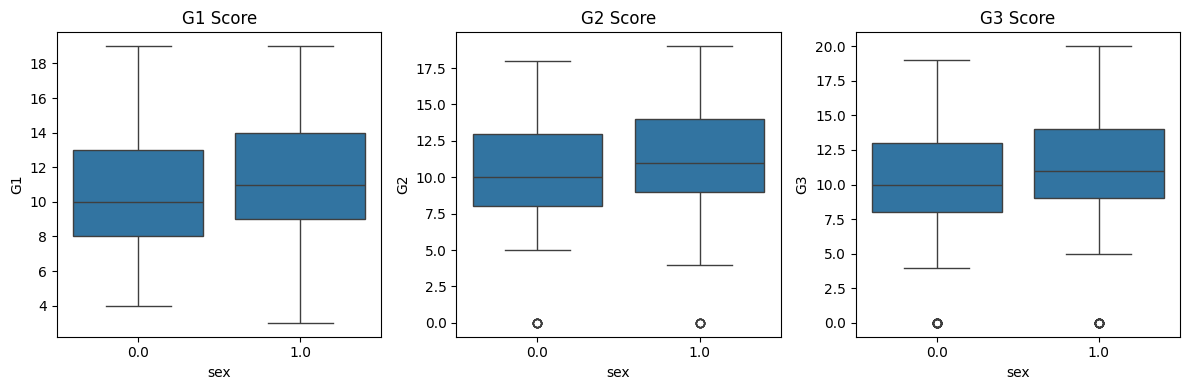

In [113]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student-mat.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Convert columns to PyTorch tensors for manipulation
sex_tensor = torch.tensor([0 if s == 'F' else 1 for s in data['sex']], dtype=torch.float)  # Convert 'sex' to binary (0: F, 1: M)
G1_tensor = torch.tensor(data['G1'].values, dtype=torch.float)
G2_tensor = torch.tensor(data['G2'].values, dtype=torch.float)
G3_tensor = torch.tensor(data['G3'].values, dtype=torch.float)

# Convert tensors back to NumPy arrays for plotting
data['sex'] = sex_tensor.numpy()
data['G1'] = G1_tensor.numpy()
data['G2'] = G2_tensor.numpy()
data['G3'] = G3_tensor.numpy()

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of G1 by sex
sns.boxplot(ax=axs[0], x='sex', y='G1', data=data)
axs[0].set_title('G1 Score')

# Box plot of G2 by sex
sns.boxplot(ax=axs[1], x='sex', y='G2', data=data)
axs[1].set_title('G2 Score')

# Box plot of G3 by sex
sns.boxplot(ax=axs[2], x='sex', y='G3', data=data)
axs[2].set_title('G3 Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()


In [114]:
import torch
import pandas as pd

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Convert the dataset to PyTorch tensor (only numerical columns)
# Non-numerical columns like 'sex' would need to be encoded first
data_tensor = torch.tensor(data.select_dtypes(include=['float64', 'int64']).values, dtype=torch.float)

# Check for NaN values in the tensor
nan_check = torch.isnan(data_tensor)

# Sum of NaN values for each column
nan_count = nan_check.sum(dim=0)

# Print the result for each numerical column
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    print(f"Missing values in {col}: {nan_count[i].item()}")


Missing values in age: 0
Missing values in Medu: 0
Missing values in Fedu: 0
Missing values in traveltime: 0
Missing values in studytime: 0
Missing values in failures: 0
Missing values in famrel: 0
Missing values in freetime: 0
Missing values in goout: 0
Missing values in Dalc: 0
Missing values in Walc: 0
Missing values in health: 0
Missing values in absences: 0
Missing values in G1: 0
Missing values in G2: 0
Missing values in G3: 0


In [115]:
import torch
import pandas as pd

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Select only the numerical columns from the dataset for PyTorch (pandas handles categorical data)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Convert the numerical columns to a PyTorch tensor
data_tensor = torch.tensor(numerical_data.values, dtype=torch.float)

# Check for NaN (null) values in the tensor
nan_check = torch.isnan(data_tensor)

# Count the number of NaN values in each column
nan_count = nan_check.sum(dim=0)

# Print the result for each numerical column
for i, col in enumerate(numerical_data.columns):
    print(f"Missing values in {col}: {nan_count[i].item()}")


Missing values in age: 0
Missing values in Medu: 0
Missing values in Fedu: 0
Missing values in traveltime: 0
Missing values in studytime: 0
Missing values in failures: 0
Missing values in famrel: 0
Missing values in freetime: 0
Missing values in goout: 0
Missing values in Dalc: 0
Missing values in Walc: 0
Missing values in health: 0
Missing values in absences: 0
Missing values in G1: 0
Missing values in G2: 0
Missing values in G3: 0


Epoch [10/100], Loss: 4497748539736064.0000
Epoch [20/100], Loss: 9992108584955672803171700310016.0000
Epoch [30/100], Loss: inf
Epoch [40/100], Loss: inf
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan
NaN values found in predictions.
Mean squared error on test set: 136.5443


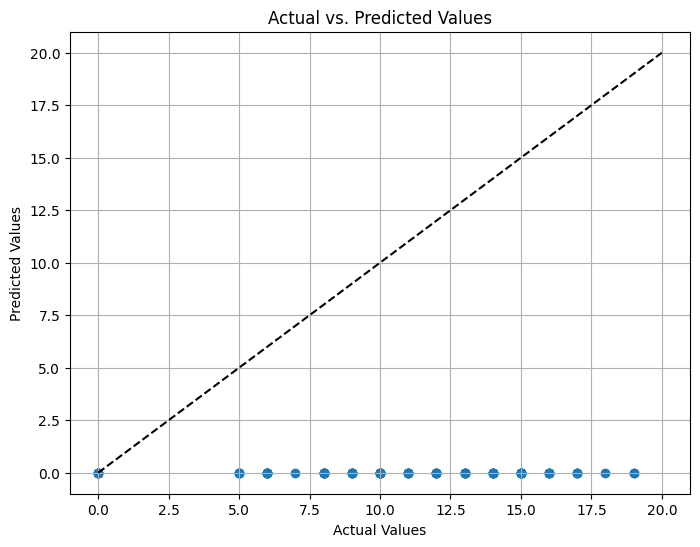

In [116]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for NaN handling

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Removed .toarray() as X_processed is already a numpy array
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple linear regression model using PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single layer linear model

    def forward(self, x):
        return self.linear(x)

# Get the input dimension (number of features)
input_dim = X_train.shape[1]

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)

    # Check for NaNs in predictions
    if torch.isnan(predictions).any():
        print("NaN values found in predictions.")
        # Handle NaNs in predictions
        predictions = torch.where(torch.isnan(predictions), torch.zeros_like(predictions), predictions)

    # Check for NaNs in y_test
    if torch.isnan(y_test).any():
        print("NaN values found in y_test.")
        # Handle NaNs in y_test
        y_test = torch.where(torch.isnan(y_test), torch.zeros_like(y_test), y_test)

    # Compute mean squared error
    test_loss = mean_squared_error(y_test, predictions)

print(f"Mean squared error on test set: {test_loss:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [10/100], Loss: 119.6127
Epoch [20/100], Loss: 100.0683
Epoch [30/100], Loss: 72.4569
Epoch [40/100], Loss: 41.5476
Epoch [50/100], Loss: 23.4652
Epoch [60/100], Loss: 21.5049
Epoch [70/100], Loss: 17.5711
Epoch [80/100], Loss: 15.6383
Epoch [90/100], Loss: 14.1034
Epoch [100/100], Loss: 12.8415
Mean squared error on test set: 12.3346


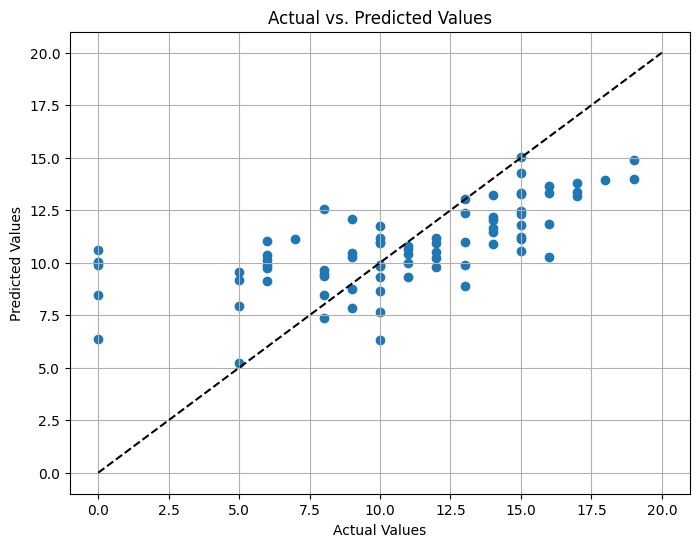

In [117]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps using sklearn's pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # No need for toarray()
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple neural network (as an alternative to decision tree)
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First fully connected layer
        self.fc2 = nn.Linear(64, 32)         # Second fully connected layer
        self.fc3 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)              # Output without activation (for regression)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = mean_squared_error(y_test, predictions)

print(f"Mean squared error on test set: {test_loss:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [10/100], Loss: 85.5425
Epoch [20/100], Loss: 35.1129
Epoch [30/100], Loss: 25.1662
Epoch [40/100], Loss: 18.3183
Epoch [50/100], Loss: 15.9792
Epoch [60/100], Loss: 13.1220
Epoch [70/100], Loss: 11.2184
Epoch [80/100], Loss: 9.4411
Epoch [90/100], Loss: 7.7739
Epoch [100/100], Loss: 6.3198
Mean squared error on test set: 7.2029


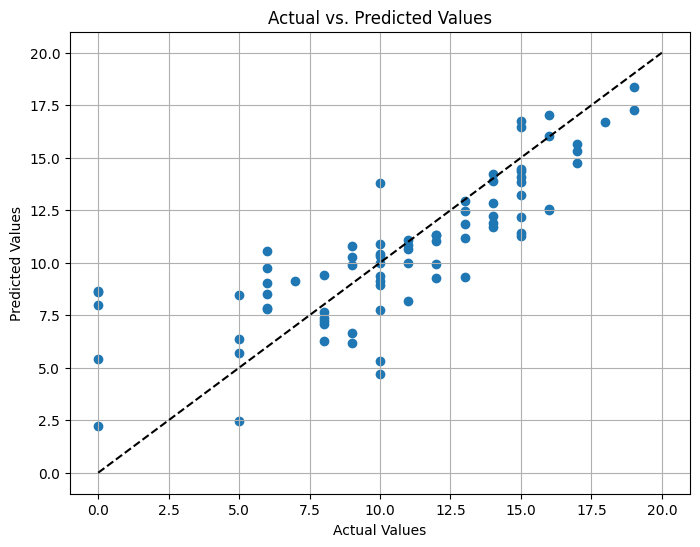

In [118]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps using sklearn's ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple neural network for regression in PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Input to hidden layer
        self.fc2 = nn.Linear(128, 64)        # Hidden to hidden layer
        self.fc3 = nn.Linear(64, 1)          # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function ReLU
        x = torch.relu(self.fc2(x))  # Activation function ReLU
        x = self.fc3(x)              # Output layer (no activation, since it's a regression)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = mean_squared_error(y_test, predictions)

print(f"Mean squared error on test set: {test_loss:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [10/100], Loss: 110.3218
Epoch [20/100], Loss: 69.3102
Epoch [30/100], Loss: 26.6714
Epoch [40/100], Loss: 24.4506
Epoch [50/100], Loss: 17.5127
Epoch [60/100], Loss: 16.1478
Epoch [70/100], Loss: 13.9805
Epoch [80/100], Loss: 12.4749
Epoch [90/100], Loss: 11.0066
Epoch [100/100], Loss: 9.5899
Mean squared error on test set: 9.2132


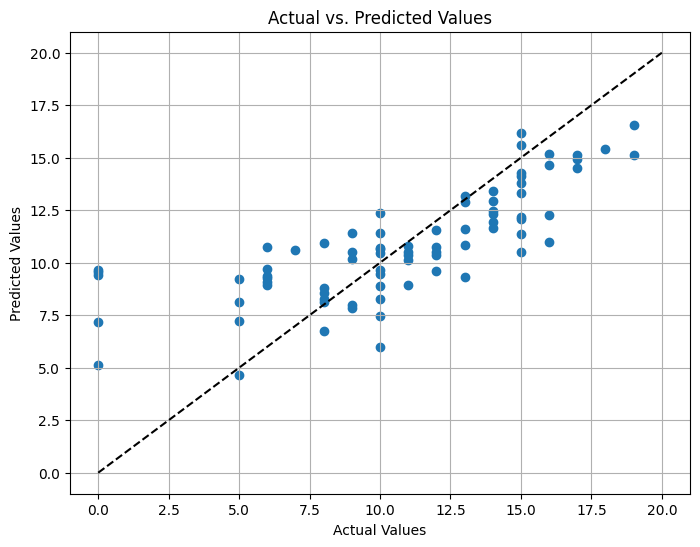

In [119]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps using sklearn's ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple neural network for regression in PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Input to hidden layer
        self.fc2 = nn.Linear(128, 64)        # Hidden to hidden layer
        self.fc3 = nn.Linear(64, 1)          # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function ReLU
        x = torch.relu(self.fc2(x))  # Activation function ReLU
        x = self.fc3(x)              # Output layer (no activation, since it's a regression)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = mean_squared_error(y_test, predictions)

print(f"Mean squared error on test set: {test_loss:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [10/100], Loss: 95.6644
Epoch [20/100], Loss: 45.7369
Epoch [30/100], Loss: 18.8393
Epoch [40/100], Loss: 15.3745
Epoch [50/100], Loss: 11.1561
Epoch [60/100], Loss: 8.8048
Epoch [70/100], Loss: 7.6833
Epoch [80/100], Loss: 6.5935
Epoch [90/100], Loss: 5.6344
Epoch [100/100], Loss: 4.7668
Mean squared error on test set: 3.3901


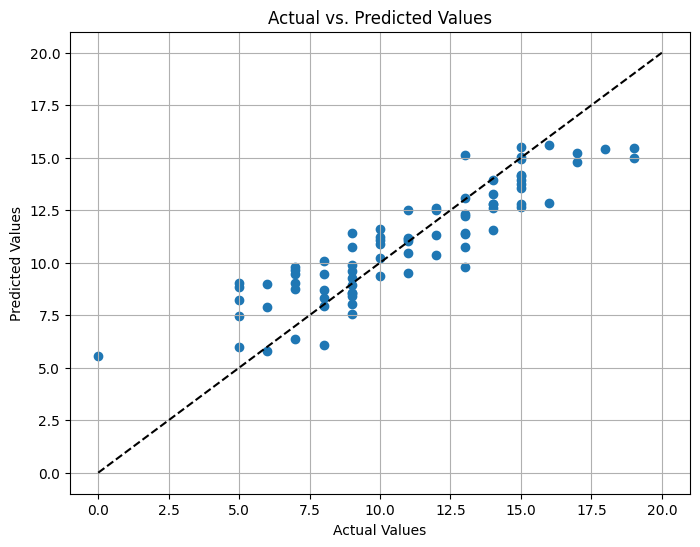

In [120]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps using sklearn's ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple neural network for regression in PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Input to hidden layer
        self.fc2 = nn.Linear(128, 64)        # Hidden to hidden layer
        self.fc3 = nn.Linear(64, 1)          # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function ReLU
        x = torch.relu(self.fc2(x))  # Activation function ReLU
        x = self.fc3(x)              # Output layer (no activation, since it's a regression)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = mean_squared_error(y_test, predictions)

print(f"Mean squared error on test set: {test_loss:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


In [121]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocess the data using OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define a neural network model
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_tensor.shape[1]
model = RegressionNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test the model and collect predictions
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Convert lists of arrays into single numpy arrays
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Evaluate the model's performance using MSE
mse = mean_squared_error(actuals, predictions)
print(f"Test MSE: {mse:.4f}")


# You can visualize the predictions vs actuals like before using matplotlib if needed.


Epoch [1/100], Loss: 129.2471, Val Loss: 93.4367
Epoch [2/100], Loss: 113.6837, Val Loss: 78.0645
Epoch [3/100], Loss: 93.0163, Val Loss: 57.2206
Epoch [4/100], Loss: 65.4860, Val Loss: 32.7342
Epoch [5/100], Loss: 36.8002, Val Loss: 13.2906
Epoch [6/100], Loss: 18.3116, Val Loss: 10.3973
Epoch [7/100], Loss: 15.7200, Val Loss: 12.5597
Epoch [8/100], Loss: 14.5346, Val Loss: 9.1542
Epoch [9/100], Loss: 11.8358, Val Loss: 7.4547
Epoch [10/100], Loss: 10.9112, Val Loss: 6.8503
Epoch [11/100], Loss: 10.0972, Val Loss: 6.7564
Epoch [12/100], Loss: 9.2283, Val Loss: 6.7851
Epoch [13/100], Loss: 8.5692, Val Loss: 6.3459
Epoch [14/100], Loss: 7.9878, Val Loss: 5.9585
Epoch [15/100], Loss: 7.3986, Val Loss: 5.3878
Epoch [16/100], Loss: 6.8051, Val Loss: 4.8305
Epoch [17/100], Loss: 6.3009, Val Loss: 4.9246
Epoch [18/100], Loss: 5.5771, Val Loss: 4.2779
Epoch [19/100], Loss: 5.1272, Val Loss: 3.7778
Epoch [20/100], Loss: 4.6283, Val Loss: 3.7289
Epoch [21/100], Loss: 4.2646, Val Loss: 3.3709
Ep

Epoch [1/100], Loss: 130.1209, Val Loss: 93.7504
Epoch [2/100], Loss: 111.7278, Val Loss: 72.3451
Epoch [3/100], Loss: 79.2611, Val Loss: 37.0403
Epoch [4/100], Loss: 36.6161, Val Loss: 10.4237
Epoch [5/100], Loss: 19.3217, Val Loss: 17.6018
Epoch [6/100], Loss: 17.7913, Val Loss: 8.5780
Epoch [7/100], Loss: 13.2758, Val Loss: 7.4847
Epoch [8/100], Loss: 11.7876, Val Loss: 7.4269
Epoch [9/100], Loss: 10.1617, Val Loss: 7.2708
Epoch [10/100], Loss: 9.0575, Val Loss: 6.4014
Epoch [11/100], Loss: 8.2535, Val Loss: 5.6471
Epoch [12/100], Loss: 7.4007, Val Loss: 5.4074
Epoch [13/100], Loss: 6.6646, Val Loss: 4.8438
Epoch [14/100], Loss: 5.9583, Val Loss: 4.6019
Epoch [15/100], Loss: 5.3488, Val Loss: 3.9517
Epoch [16/100], Loss: 4.7966, Val Loss: 3.8255
Epoch [17/100], Loss: 4.2708, Val Loss: 3.5588
Epoch [18/100], Loss: 3.8934, Val Loss: 3.0412
Epoch [19/100], Loss: 3.4006, Val Loss: 2.9183
Epoch [20/100], Loss: 3.1007, Val Loss: 2.6645
Epoch [21/100], Loss: 2.8748, Val Loss: 2.4790
Epoch 

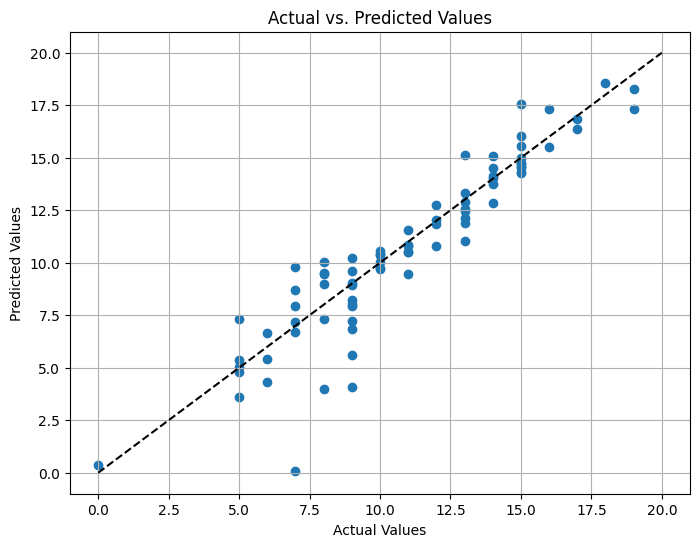

In [122]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to handle array concatenation

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define a neural network model
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
input_size = X_tensor.shape[1]  # Number of features after preprocessing
model = RegressionNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test the model
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())  # Collect predictions as numpy arrays
        actuals.append(targets.numpy())  # Collect actual targets as numpy arrays

# Concatenate the predictions and actual values from all batches
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Convert concatenated numpy arrays to PyTorch tensors
predictions_tensor = torch.tensor(predictions)
actuals_tensor = torch.tensor(actuals)

# Evaluate the model's performance using MSE
mse = criterion(predictions_tensor, actuals_tensor)
print(f"Test MSE: {mse.item()}")

# Visualize the predictions vs actuals using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(actuals_tensor, predictions_tensor)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()



Epoch [1/100], Loss: 132.7206, Val Loss: 98.5812
Epoch [2/100], Loss: 120.8020, Val Loss: 84.6432
Epoch [3/100], Loss: 99.3997, Val Loss: 59.6221
Epoch [4/100], Loss: 63.7611, Val Loss: 25.2823
Epoch [5/100], Loss: 26.0602, Val Loss: 12.0422
Epoch [6/100], Loss: 20.4106, Val Loss: 16.1428
Epoch [7/100], Loss: 16.1981, Val Loss: 8.6016
Epoch [8/100], Loss: 13.6022, Val Loss: 7.5039
Epoch [9/100], Loss: 11.7363, Val Loss: 7.3557
Epoch [10/100], Loss: 10.0001, Val Loss: 7.4336
Epoch [11/100], Loss: 8.9330, Val Loss: 6.4095
Epoch [12/100], Loss: 8.0166, Val Loss: 5.5608
Epoch [13/100], Loss: 7.3760, Val Loss: 5.4481
Epoch [14/100], Loss: 6.5506, Val Loss: 4.8829
Epoch [15/100], Loss: 5.9434, Val Loss: 4.4179
Epoch [16/100], Loss: 5.4079, Val Loss: 4.1812
Epoch [17/100], Loss: 4.8752, Val Loss: 3.6637
Epoch [18/100], Loss: 4.4412, Val Loss: 3.4609
Epoch [19/100], Loss: 4.0375, Val Loss: 3.0150
Epoch [20/100], Loss: 3.6358, Val Loss: 2.9145
Epoch [21/100], Loss: 3.2816, Val Loss: 2.6083
Epoc

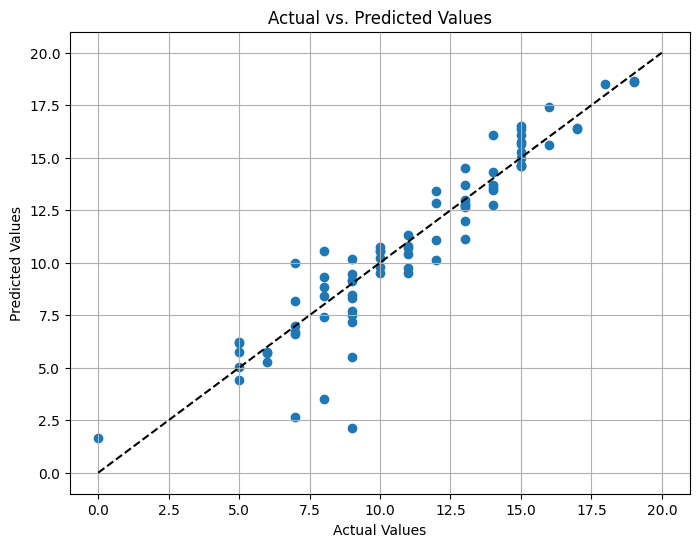

In [123]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to handle array concatenation

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define a neural network model for regression
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
input_size = X_tensor.shape[1]  # Number of features after preprocessing
model = RegressionNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test the model
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())  # Collect predictions as numpy arrays
        actuals.append(targets.numpy())  # Collect actual targets as numpy arrays

# Concatenate the predictions and actual values from all batches
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Convert concatenated numpy arrays to PyTorch tensors
predictions_tensor = torch.tensor(predictions)
actuals_tensor = torch.tensor(actuals)

# Evaluate the model's performance using MSE
mse = criterion(predictions_tensor, actuals_tensor)
print(f"Test MSE: {mse.item()}")

# Visualize the predictions vs actuals using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(actuals_tensor, predictions_tensor)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [1/100], Loss: 98.2086, Val Loss: 46.6601
Epoch [2/100], Loss: 51.2383, Val Loss: 19.9312
Epoch [3/100], Loss: 25.7657, Val Loss: 9.4509
Epoch [4/100], Loss: 16.4337, Val Loss: 7.2718
Epoch [5/100], Loss: 13.1042, Val Loss: 7.0242
Epoch [6/100], Loss: 10.6318, Val Loss: 5.9936
Epoch [7/100], Loss: 8.4353, Val Loss: 4.7810
Epoch [8/100], Loss: 6.7057, Val Loss: 3.8203
Epoch [9/100], Loss: 5.5792, Val Loss: 3.3208
Epoch [10/100], Loss: 4.8464, Val Loss: 3.0735
Epoch [11/100], Loss: 4.3276, Val Loss: 2.9847
Epoch [12/100], Loss: 3.9764, Val Loss: 2.9495
Epoch [13/100], Loss: 3.7519, Val Loss: 2.9527
Epoch [14/100], Loss: 3.5393, Val Loss: 2.8977
Epoch [15/100], Loss: 3.3534, Val Loss: 2.7958
Epoch [16/100], Loss: 3.2280, Val Loss: 2.7295
Epoch [17/100], Loss: 3.1247, Val Loss: 2.6959
Epoch [18/100], Loss: 3.0088, Val Loss: 2.6564
Epoch [19/100], Loss: 2.9007, Val Loss: 2.6064
Epoch [20/100], Loss: 2.8555, Val Loss: 2.6056
Epoch [21/100], Loss: 2.7698, Val Loss: 2.5621
Epoch [22/100]

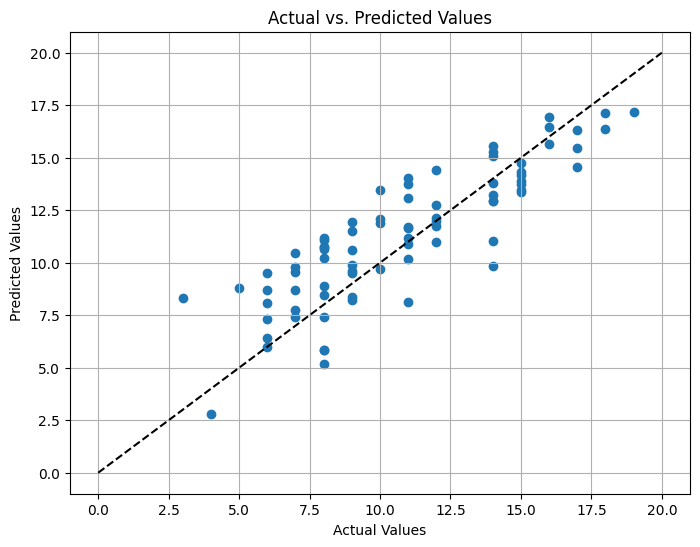

In [124]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to handle array concatenation

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define a linear regression model in PyTorch
class LinearRegressionNN(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionNN, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Single layer for linear regression

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X_tensor.shape[1]  # Number of features after preprocessing
model = LinearRegressionNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test the model
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())  # Collect predictions as numpy arrays
        actuals.append(targets.numpy())  # Collect actual targets as numpy arrays

# Concatenate the predictions and actual values from all batches
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Convert concatenated numpy arrays to PyTorch tensors
predictions_tensor = torch.tensor(predictions).squeeze()
actuals_tensor = torch.tensor(actuals).squeeze()

# Evaluate the model's performance using MSE
mse = criterion(predictions_tensor, actuals_tensor)
print(f"Test MSE: {mse.item()}")

# Visualize the predictions vs actuals using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(actuals_tensor, predictions_tensor)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [1/100], Loss: 63.0574, Val Loss: 41.7729
Epoch [2/100], Loss: 19.7725, Val Loss: 9.1496
Epoch [3/100], Loss: 11.7811, Val Loss: 5.4983
Epoch [4/100], Loss: 6.2576, Val Loss: 2.8024
Epoch [5/100], Loss: 4.1931, Val Loss: 2.7567
Epoch [6/100], Loss: 3.3958, Val Loss: 2.5586
Epoch [7/100], Loss: 2.8205, Val Loss: 2.4597
Epoch [8/100], Loss: 2.4073, Val Loss: 2.5005
Epoch [9/100], Loss: 2.2357, Val Loss: 2.4189
Epoch [10/100], Loss: 2.0936, Val Loss: 2.3409
Epoch [11/100], Loss: 2.0187, Val Loss: 2.3818
Epoch [12/100], Loss: 1.9283, Val Loss: 2.1358
Epoch [13/100], Loss: 1.8553, Val Loss: 2.1135
Epoch [14/100], Loss: 1.8526, Val Loss: 2.0966
Epoch [15/100], Loss: 1.7780, Val Loss: 2.2737
Epoch [16/100], Loss: 1.7305, Val Loss: 1.9998
Epoch [17/100], Loss: 1.7365, Val Loss: 2.7994
Epoch [18/100], Loss: 1.7334, Val Loss: 1.9568
Epoch [19/100], Loss: 1.6172, Val Loss: 1.9937
Epoch [20/100], Loss: 1.5581, Val Loss: 2.2150
Epoch [21/100], Loss: 1.5731, Val Loss: 1.9072
Epoch [22/100], Lo

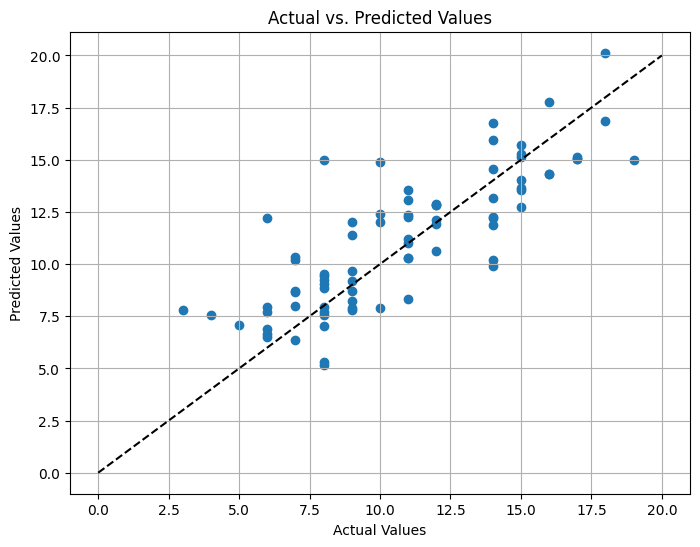

In [125]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to handle array concatenation

# Load the dataset
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)  # Remove the toarray() call
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define a neural network to approximate decision tree behavior
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        # Define a simple feedforward neural network
        self.fc1 = nn.Linear(input_size, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 32)  # Second hidden layer
        self.fc3 = nn.Linear(32, 1)   # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))   # Activation for first hidden layer
        x = torch.relu(self.fc2(x))   # Activation for second hidden layer
        return self.fc3(x)            # Output layer for regression

# Instantiate the model
input_size = X_tensor.shape[1]  # Number of features after preprocessing
model = RegressionNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test the model
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())  # Collect predictions as numpy arrays
        actuals.append(targets.numpy())  # Collect actual targets as numpy arrays

# Concatenate the predictions and actual values from all batches
predictions = np.concatenate(predictions, axis=0)  # Flatten the list of arrays into one array
actuals = np.concatenate(actuals, axis=0)

# Convert concatenated numpy arrays to PyTorch tensors
predictions_tensor = torch.tensor(predictions).squeeze()
actuals_tensor = torch.tensor(actuals).squeeze()

# Evaluate the model's performance using MSE
mse = criterion(predictions_tensor, actuals_tensor)
print(f"Test MSE: {mse.item()}")

# Visualize the predictions vs actuals using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(actuals_tensor, predictions_tensor)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([252, 1])) that is different to the input size (torch.Size([252])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Training Loss: 124.2073, Validation Loss: 91.0928
Epoch [20/100], Training Loss: 98.5045, Validation Loss: 67.9852
Epoch [30/100], Training Loss: 53.3909, Validation Loss: 30.3556
Epoch [40/100], Training Loss: 13.3176, Validation Loss: 6.5275
Epoch [50/100], Training Loss: 16.2533, Validation Loss: 17.0596
Epoch [60/100], Training Loss: 11.2497, Validation Loss: 7.7048
Epoch [70/100], Training Loss: 11.8144, Validation Loss: 6.5222
Epoch [80/100], Training Loss: 11.1632, Validation Loss: 8.0390
Epoch [90/100], Training Loss: 11.2218, Validation Loss: 8.6545
Epoch [100/100], Training Loss: 11.1302, Validation Loss: 7.7202
Test MSE: 13.6127


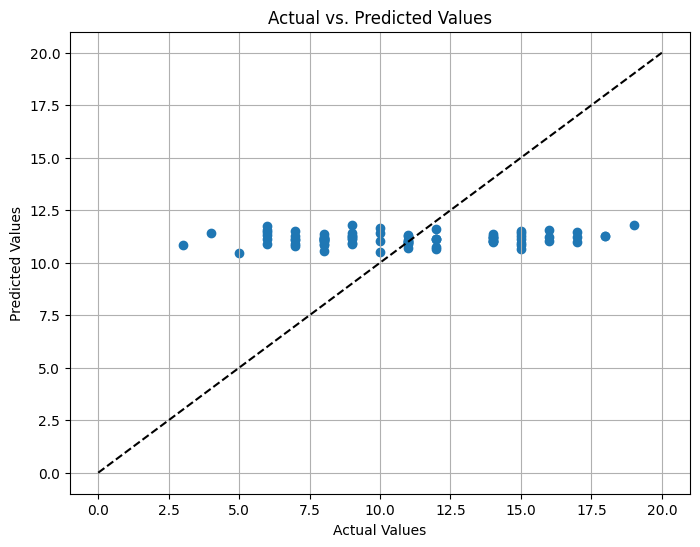

In [126]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Preprocess categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False)  # Update for sklearn warning
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Preprocess ordinal variables
scaler = StandardScaler()
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Combine preprocessed data
X_preprocessed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_preprocessed, dtype=torch.float32)  # Use X_preprocessed
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_preprocessed.shape[1]  # Correctly use X_preprocessed.shape[1] for input size
model = RegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs.squeeze(), y_val).item()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()
    test_loss = mean_squared_error(y_test, predictions)

print(f"Test MSE: {test_loss:.4f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([252, 1])) that is different to the input size (torch.Size([252])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Training Loss: 119.0256, Validation Loss: 85.9936
Epoch [20/100], Training Loss: 87.6766, Validation Loss: 57.7392
Epoch [30/100], Training Loss: 38.1713, Validation Loss: 18.1208
Epoch [40/100], Training Loss: 11.9357, Validation Loss: 11.8423
Epoch [50/100], Training Loss: 14.2379, Validation Loss: 13.6597
Epoch [60/100], Training Loss: 11.6176, Validation Loss: 6.5711
Epoch [70/100], Training Loss: 11.4707, Validation Loss: 6.9471
Epoch [80/100], Training Loss: 11.2214, Validation Loss: 8.9516
Epoch [90/100], Training Loss: 11.1297, Validation Loss: 8.1779
Epoch [100/100], Training Loss: 11.1276, Validation Loss: 7.6153
Test MSE: 13.3990


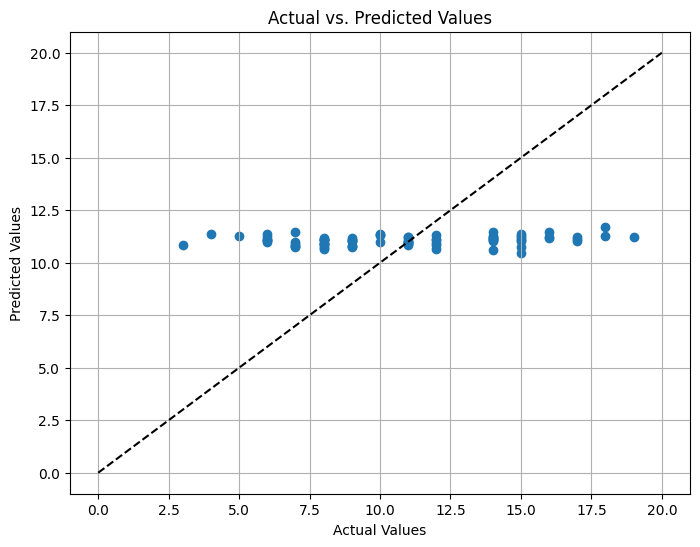

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Preprocess categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False)  # Update for sklearn version warning
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Preprocess ordinal variables
scaler = StandardScaler()
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Combine preprocessed data
X_preprocessed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_preprocessed, dtype=torch.float32)  # Use X_preprocessed here
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_preprocessed.shape[1]  # Use X_preprocessed to determine the correct input size
model = RegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), y_val).item()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()
    test_loss = mean_squared_error(y_test, predictions)

print(f"Test MSE: {test_loss:.4f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([252, 1])) that is different to the input size (torch.Size([252])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Training Loss: 107.5199, Validation Loss: 76.0042
Epoch [20/100], Training Loss: 75.9864, Validation Loss: 51.6571
Epoch [30/100], Training Loss: 52.3373, Validation Loss: 33.5475
Epoch [40/100], Training Loss: 35.7656, Validation Loss: 20.9890
Epoch [50/100], Training Loss: 24.9270, Validation Loss: 13.1053
Epoch [60/100], Training Loss: 18.3252, Validation Loss: 8.7985
Epoch [70/100], Training Loss: 14.5924, Validation Loss: 6.8896
Epoch [80/100], Training Loss: 12.6439, Validation Loss: 6.3648
Epoch [90/100], Training Loss: 11.7112, Validation Loss: 6.5043
Epoch [100/100], Training Loss: 11.3043, Validation Loss: 6.8698
Test MSE: 13.5296


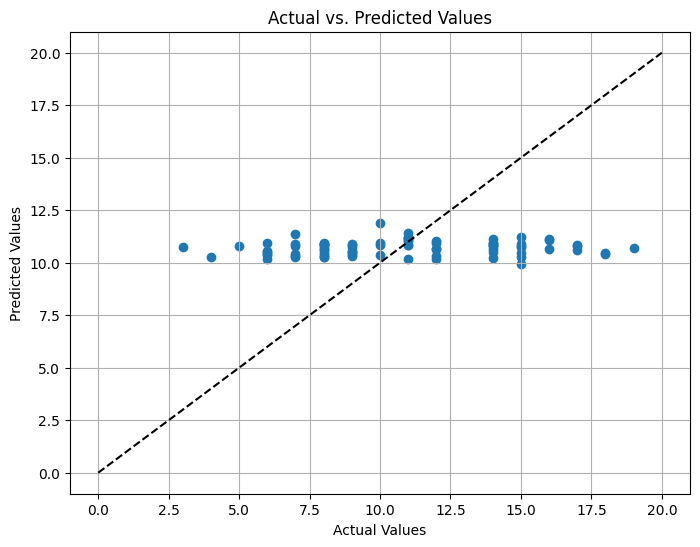

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Preprocess categorical variables using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)  # Updated for newer sklearn versions
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Preprocess ordinal variables using StandardScaler
scaler = StandardScaler()
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Combine preprocessed data (nominal and ordinal)
X_preprocessed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_preprocessed, dtype=torch.float32)  # Correctly use X_preprocessed
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple Linear Regression model in PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Simple linear layer

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_preprocessed.shape[1]  # Number of features from X_preprocessed
model = LinearRegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradient
    outputs = model(X_train).squeeze()  # Forward pass
    loss = criterion(outputs, y_train)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update model parameters

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val).squeeze()
        val_loss = criterion(val_outputs, y_val).item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()
    test_mse = mean_squared_error(y_test, predictions)

print(f"Test MSE: {test_mse:.4f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Epoch [10/100], Training Loss: 0.2083, Validation Loss: 0.2024
Epoch [20/100], Training Loss: 0.1579, Validation Loss: 0.1645
Epoch [30/100], Training Loss: 0.1090, Validation Loss: 0.1327
Epoch [40/100], Training Loss: 0.0604, Validation Loss: 0.1070
Epoch [50/100], Training Loss: 0.0278, Validation Loss: 0.0950
Epoch [60/100], Training Loss: 0.0121, Validation Loss: 0.0927
Epoch [70/100], Training Loss: 0.0027, Validation Loss: 0.0921
Epoch [80/100], Training Loss: 0.0006, Validation Loss: 0.0928
Epoch [90/100], Training Loss: 0.0004, Validation Loss: 0.0932
Epoch [100/100], Training Loss: 0.0001, Validation Loss: 0.0927
Test MSE: 0.0878


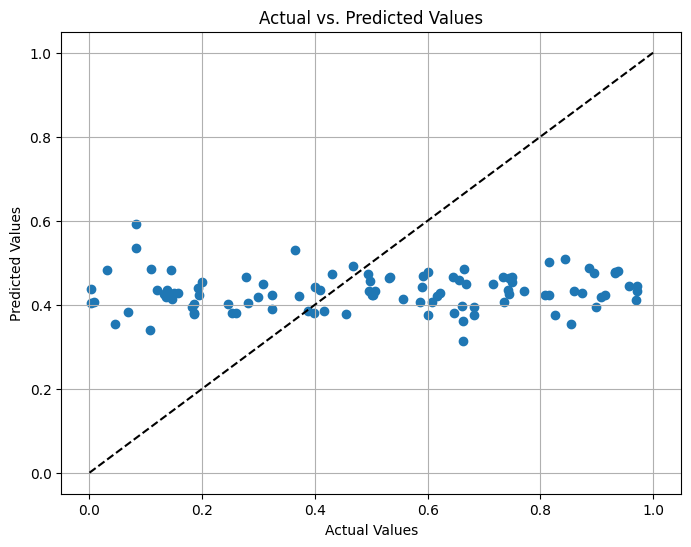

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
# Assuming X is your feature matrix and y is the target variable
# nominal_vars and ordinal_vars should be lists of column indices or column names
X = np.random.rand(500, 10)  # Example data
y = np.random.rand(500)  # Example target
nominal_vars = [0, 1, 2]  # Replace with actual nominal variable indices
ordinal_vars = [3, 4, 5, 6, 7, 8, 9]  # Replace with actual ordinal variable indices

# Preprocess categorical variables using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
X_nominal = onehot_encoder.fit_transform(X[:, nominal_vars])

# Preprocess ordinal variables using StandardScaler
scaler = StandardScaler()
X_ordinal = scaler.fit_transform(X[:, ordinal_vars])

# Combine preprocessed data (nominal and ordinal)
X_preprocessed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_preprocessed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple Neural Network model in PyTorch (to replace Decision Tree)
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First layer
        self.fc2 = nn.Linear(64, 32)        # Second layer
        self.fc3 = nn.Linear(32, 1)         # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation at the output for regression
        return x

# Initialize the model
input_dim = X_preprocessed.shape[1]  # Number of features
model = RegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradient
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update model parameters

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val).item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()  # Get predictions
    test_mse = mean_squared_error(y_test, predictions)

print(f"Test MSE: {test_mse:.4f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 1], [0, 1], '--k')  # Diagonal line for reference (adjust range if needed)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [1/100], Train Loss: 146.6611, Val Loss: 141.5478
Epoch [2/100], Train Loss: 137.6070, Val Loss: 127.6101
Epoch [3/100], Train Loss: 116.5286, Val Loss: 96.1986
Epoch [4/100], Train Loss: 74.4292, Val Loss: 44.4058
Epoch [5/100], Train Loss: 23.7217, Val Loss: 5.4796
Epoch [6/100], Train Loss: 6.6807, Val Loss: 5.2374
Epoch [7/100], Train Loss: 5.0971, Val Loss: 2.4174
Epoch [8/100], Train Loss: 3.8334, Val Loss: 2.1739
Epoch [9/100], Train Loss: 3.2903, Val Loss: 1.7036
Epoch [10/100], Train Loss: 2.9892, Val Loss: 1.5031
Epoch [11/100], Train Loss: 2.7153, Val Loss: 1.3675
Epoch [12/100], Train Loss: 2.5573, Val Loss: 1.2425
Epoch [13/100], Train Loss: 2.4141, Val Loss: 1.1651
Epoch [14/100], Train Loss: 2.3152, Val Loss: 1.0987
Epoch [15/100], Train Loss: 2.2164, Val Loss: 1.0694
Epoch [16/100], Train Loss: 2.1391, Val Loss: 1.0339
Epoch [17/100], Train Loss: 2.0841, Val Loss: 1.0108
Epoch [18/100], Train Loss: 2.0364, Val Loss: 0.9939
Epoch [19/100], Train Loss: 1.9813, Val L

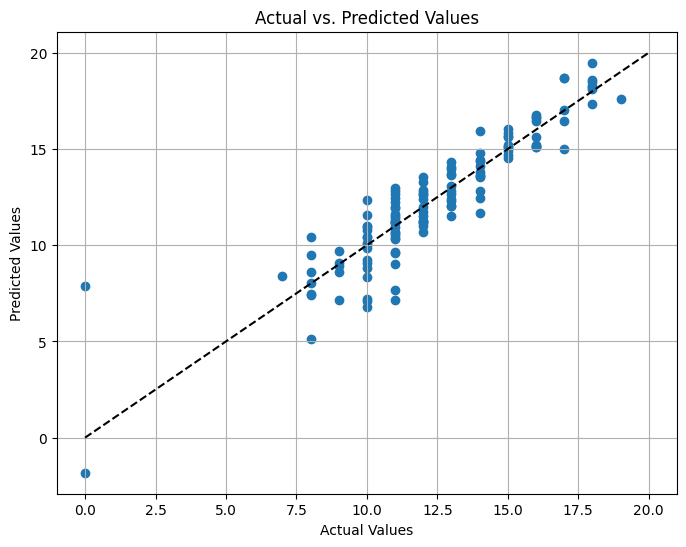

In [130]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple feedforward neural network
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = X_processed.shape[1]
model = RegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [1/100], Train Loss: 141.5227, Val Loss: 126.7602
Epoch [2/100], Train Loss: 107.2732, Val Loss: 74.5104
Epoch [3/100], Train Loss: 43.0147, Val Loss: 8.5336
Epoch [4/100], Train Loss: 9.1232, Val Loss: 7.0307
Epoch [5/100], Train Loss: 5.2960, Val Loss: 2.9381
Epoch [6/100], Train Loss: 3.9294, Val Loss: 1.8731
Epoch [7/100], Train Loss: 3.0351, Val Loss: 1.6331
Epoch [8/100], Train Loss: 2.7005, Val Loss: 1.4096
Epoch [9/100], Train Loss: 2.4668, Val Loss: 1.3106
Epoch [10/100], Train Loss: 2.3134, Val Loss: 1.2423
Epoch [11/100], Train Loss: 2.1957, Val Loss: 1.1852
Epoch [12/100], Train Loss: 2.0998, Val Loss: 1.1384
Epoch [13/100], Train Loss: 2.0390, Val Loss: 1.1287
Epoch [14/100], Train Loss: 1.9733, Val Loss: 1.1246
Epoch [15/100], Train Loss: 1.9284, Val Loss: 1.1042
Epoch [16/100], Train Loss: 1.8813, Val Loss: 1.1013
Epoch [17/100], Train Loss: 1.8261, Val Loss: 1.1257
Epoch [18/100], Train Loss: 1.7892, Val Loss: 1.1232
Epoch [19/100], Train Loss: 1.7596, Val Loss: 1

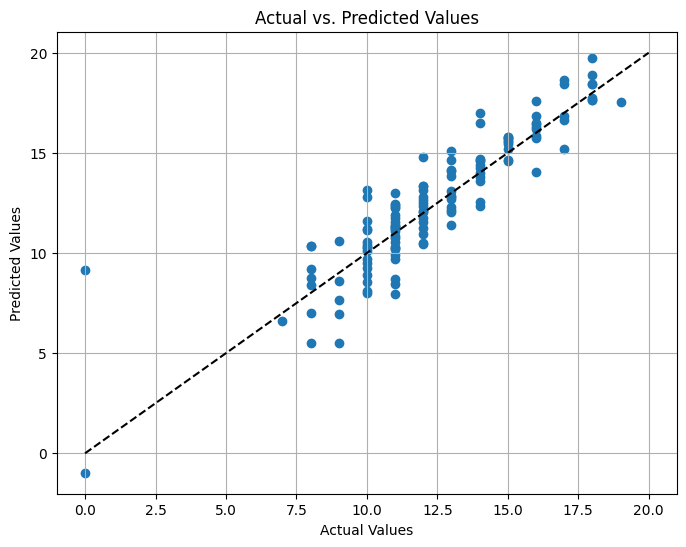

In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple feedforward neural network
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = X_processed.shape[1]
model = RegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [1/100], Train Loss: 111.2742, Val Loss: 82.0078
Epoch [2/100], Train Loss: 65.0752, Val Loss: 48.4829
Epoch [3/100], Train Loss: 39.0234, Val Loss: 29.5447
Epoch [4/100], Train Loss: 24.2121, Val Loss: 18.7498
Epoch [5/100], Train Loss: 15.7240, Val Loss: 12.5656
Epoch [6/100], Train Loss: 10.8281, Val Loss: 8.9796
Epoch [7/100], Train Loss: 7.9451, Val Loss: 6.8762
Epoch [8/100], Train Loss: 6.2330, Val Loss: 5.6120
Epoch [9/100], Train Loss: 5.1751, Val Loss: 4.8187
Epoch [10/100], Train Loss: 4.4897, Val Loss: 4.3027
Epoch [11/100], Train Loss: 4.0342, Val Loss: 3.9544
Epoch [12/100], Train Loss: 3.7082, Val Loss: 3.7013
Epoch [13/100], Train Loss: 3.4640, Val Loss: 3.5119
Epoch [14/100], Train Loss: 3.2883, Val Loss: 3.3603
Epoch [15/100], Train Loss: 3.1235, Val Loss: 3.2349
Epoch [16/100], Train Loss: 2.9941, Val Loss: 3.1287
Epoch [17/100], Train Loss: 2.8841, Val Loss: 3.0357
Epoch [18/100], Train Loss: 2.7845, Val Loss: 2.9534
Epoch [19/100], Train Loss: 2.7024, Val Los

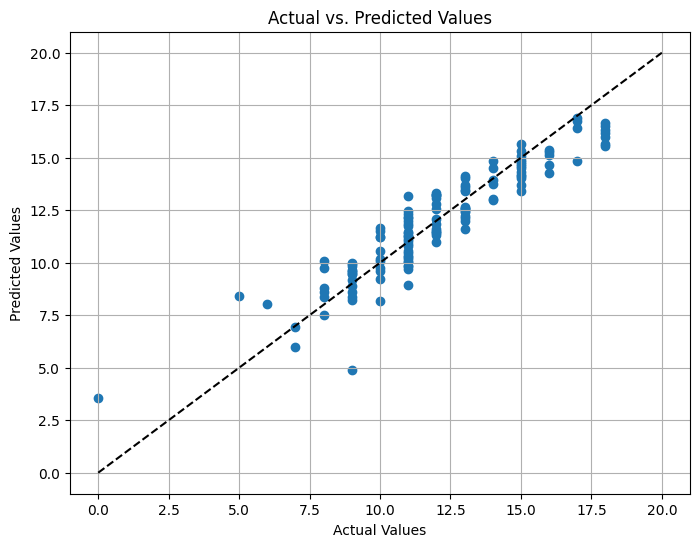

Mean Squared Error: 1.2927


In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_size = X_processed.shape[1]
model = LinearRegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Calculate mean squared error (MSE)
mse = np.mean((predictions - actuals) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


Epoch [1/100], Train Loss: 132.7982, Val Loss: 122.8270
Epoch [2/100], Train Loss: 108.0331, Val Loss: 83.4469
Epoch [3/100], Train Loss: 53.5243, Val Loss: 17.9461
Epoch [4/100], Train Loss: 7.7239, Val Loss: 8.8908
Epoch [5/100], Train Loss: 4.9014, Val Loss: 2.4374


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [6/100], Train Loss: 2.3742, Val Loss: 2.1191
Epoch [7/100], Train Loss: 1.6593, Val Loss: 1.8197
Epoch [8/100], Train Loss: 1.4532, Val Loss: 1.5192
Epoch [9/100], Train Loss: 1.3297, Val Loss: 1.4055
Epoch [10/100], Train Loss: 1.2398, Val Loss: 1.3204
Epoch [11/100], Train Loss: 1.1736, Val Loss: 1.2459
Epoch [12/100], Train Loss: 1.1204, Val Loss: 1.2131
Epoch [13/100], Train Loss: 1.0866, Val Loss: 1.1731
Epoch [14/100], Train Loss: 1.0479, Val Loss: 1.1487
Epoch [15/100], Train Loss: 1.0214, Val Loss: 1.1504
Epoch [16/100], Train Loss: 0.9957, Val Loss: 1.1406
Epoch [17/100], Train Loss: 0.9765, Val Loss: 1.1251
Epoch [18/100], Train Loss: 0.9358, Val Loss: 1.1297
Epoch [19/100], Train Loss: 0.9281, Val Loss: 1.1012
Epoch [20/100], Train Loss: 0.9015, Val Loss: 1.1224
Epoch [21/100], Train Loss: 0.8825, Val Loss: 1.1241
Epoch [22/100], Train Loss: 0.8661, Val Loss: 1.1301
Epoch [23/100], Train Loss: 0.8490, Val Loss: 1.1218
Epoch [24/100], Train Loss: 0.8309, Val Loss: 1.13

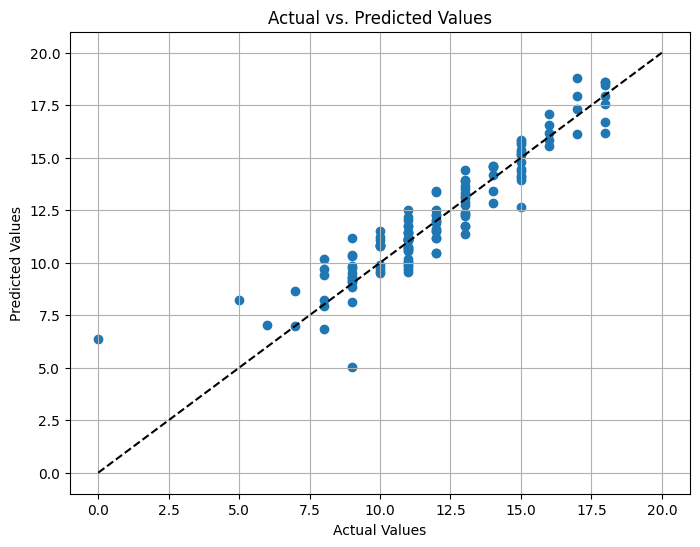

Mean Squared Error: 1.2748


In [133]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network model that mimics decision trees (a deeper tree can be represented by a deep network)
class DecisionTreeNN(nn.Module):
    def __init__(self, input_size):
        super(DecisionTreeNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model
input_size = X_processed.shape[1]
model = DecisionTreeNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Calculate mean squared error (MSE)
mse = np.mean((predictions - actuals) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


Epoch [1/100], Train Loss: 128.2822, Val Loss: 112.3084
Epoch [2/100], Train Loss: 88.8560, Val Loss: 53.7723
Epoch [3/100], Train Loss: 25.5034, Val Loss: 5.7540
Epoch [4/100], Train Loss: 8.1845, Val Loss: 4.0030
Epoch [5/100], Train Loss: 3.1872, Val Loss: 3.0132
Epoch [6/100], Train Loss: 2.3551, Val Loss: 2.2238


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [7/100], Train Loss: 1.8147, Val Loss: 1.7880
Epoch [8/100], Train Loss: 1.5455, Val Loss: 1.5755
Epoch [9/100], Train Loss: 1.3703, Val Loss: 1.4442
Epoch [10/100], Train Loss: 1.2805, Val Loss: 1.3421
Epoch [11/100], Train Loss: 1.1991, Val Loss: 1.2749
Epoch [12/100], Train Loss: 1.1486, Val Loss: 1.2026
Epoch [13/100], Train Loss: 1.0945, Val Loss: 1.1875
Epoch [14/100], Train Loss: 1.0648, Val Loss: 1.1846
Epoch [15/100], Train Loss: 1.0353, Val Loss: 1.1435
Epoch [16/100], Train Loss: 0.9908, Val Loss: 1.1360
Epoch [17/100], Train Loss: 0.9695, Val Loss: 1.1276
Epoch [18/100], Train Loss: 0.9438, Val Loss: 1.1280
Epoch [19/100], Train Loss: 0.9239, Val Loss: 1.1265
Epoch [20/100], Train Loss: 0.9118, Val Loss: 1.1479
Epoch [21/100], Train Loss: 0.8869, Val Loss: 1.1273
Epoch [22/100], Train Loss: 0.8667, Val Loss: 1.1596
Epoch [23/100], Train Loss: 0.8658, Val Loss: 1.1595
Epoch [24/100], Train Loss: 0.8388, Val Loss: 1.1672
Epoch [25/100], Train Loss: 0.8199, Val Loss: 1.1

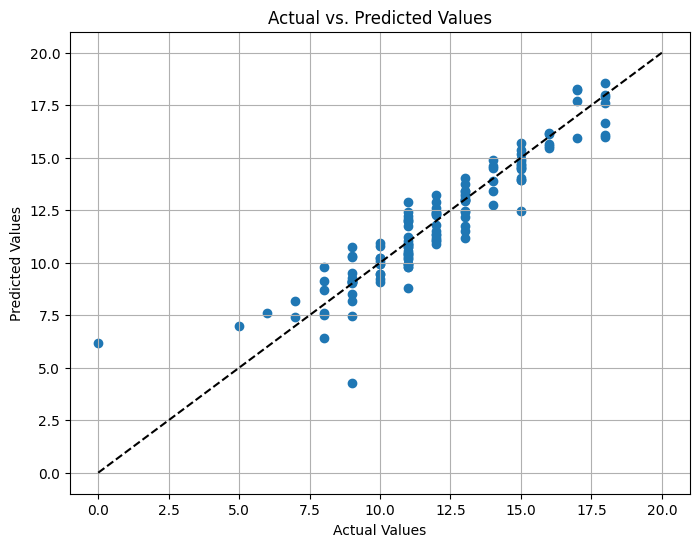

Mean Squared Error: 1.2583


In [134]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network model for regression
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model
input_size = X_processed.shape[1]
model = NeuralNet(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Calculate mean squared error (MSE)
mse = np.mean((predictions - actuals) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


Epoch [1/100], Train Loss: 128.8805, Val Loss: 113.7986
Epoch [2/100], Train Loss: 91.6189, Val Loss: 59.0635
Epoch [3/100], Train Loss: 28.2672, Val Loss: 4.6128
Epoch [4/100], Train Loss: 6.7718, Val Loss: 5.3210
Epoch [5/100], Train Loss: 2.7439, Val Loss: 3.1435


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [6/100], Train Loss: 2.1569, Val Loss: 2.0359
Epoch [7/100], Train Loss: 1.5779, Val Loss: 1.7591
Epoch [8/100], Train Loss: 1.3502, Val Loss: 1.5348
Epoch [9/100], Train Loss: 1.2272, Val Loss: 1.4232
Epoch [10/100], Train Loss: 1.1537, Val Loss: 1.3242
Epoch [11/100], Train Loss: 1.0971, Val Loss: 1.2657
Epoch [12/100], Train Loss: 1.0610, Val Loss: 1.2268
Epoch [13/100], Train Loss: 1.0223, Val Loss: 1.1975
Epoch [14/100], Train Loss: 0.9953, Val Loss: 1.1864
Epoch [15/100], Train Loss: 0.9656, Val Loss: 1.1763
Epoch [16/100], Train Loss: 0.9423, Val Loss: 1.1459
Epoch [17/100], Train Loss: 0.9312, Val Loss: 1.1686
Epoch [18/100], Train Loss: 0.8941, Val Loss: 1.1740
Epoch [19/100], Train Loss: 0.8682, Val Loss: 1.1810
Epoch [20/100], Train Loss: 0.8551, Val Loss: 1.1854
Epoch [21/100], Train Loss: 0.8431, Val Loss: 1.1917
Epoch [22/100], Train Loss: 0.8208, Val Loss: 1.1955
Epoch [23/100], Train Loss: 0.8032, Val Loss: 1.2197
Epoch [24/100], Train Loss: 0.7916, Val Loss: 1.20

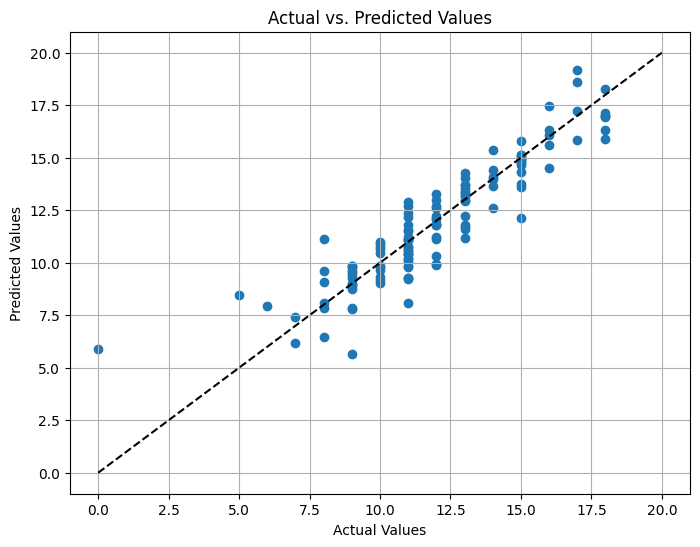

Mean Squared Error: 1.5091


In [135]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network model for regression
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model
input_size = X_processed.shape[1]
model = NeuralNet(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Calculate mean squared error (MSE)
mse = np.mean((predictions - actuals) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


Epoch [1/100], Train Loss: 123.3836, Val Loss: 123.0685
Epoch [2/100], Train Loss: 118.4230, Val Loss: 118.1259
Epoch [3/100], Train Loss: 113.5532, Val Loss: 113.3171
Epoch [4/100], Train Loss: 108.8668, Val Loss: 108.6695
Epoch [5/100], Train Loss: 104.2970, Val Loss: 104.1994


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [6/100], Train Loss: 99.9131, Val Loss: 99.8812
Epoch [7/100], Train Loss: 95.6760, Val Loss: 95.7087
Epoch [8/100], Train Loss: 91.5866, Val Loss: 91.6297
Epoch [9/100], Train Loss: 87.5808, Val Loss: 87.7329
Epoch [10/100], Train Loss: 83.7892, Val Loss: 83.9743
Epoch [11/100], Train Loss: 80.1058, Val Loss: 80.3181
Epoch [12/100], Train Loss: 76.5390, Val Loss: 76.8291
Epoch [13/100], Train Loss: 73.0963, Val Loss: 73.4538
Epoch [14/100], Train Loss: 69.8035, Val Loss: 70.1476
Epoch [15/100], Train Loss: 66.5832, Val Loss: 67.0134
Epoch [16/100], Train Loss: 63.5053, Val Loss: 63.9984
Epoch [17/100], Train Loss: 60.5461, Val Loss: 61.0770
Epoch [18/100], Train Loss: 57.7270, Val Loss: 58.2600
Epoch [19/100], Train Loss: 54.9894, Val Loss: 55.5736
Epoch [20/100], Train Loss: 52.3417, Val Loss: 52.9755
Epoch [21/100], Train Loss: 49.8290, Val Loss: 50.5044
Epoch [22/100], Train Loss: 47.4269, Val Loss: 48.1091
Epoch [23/100], Train Loss: 45.0984, Val Loss: 45.7882
Epoch [24/100]

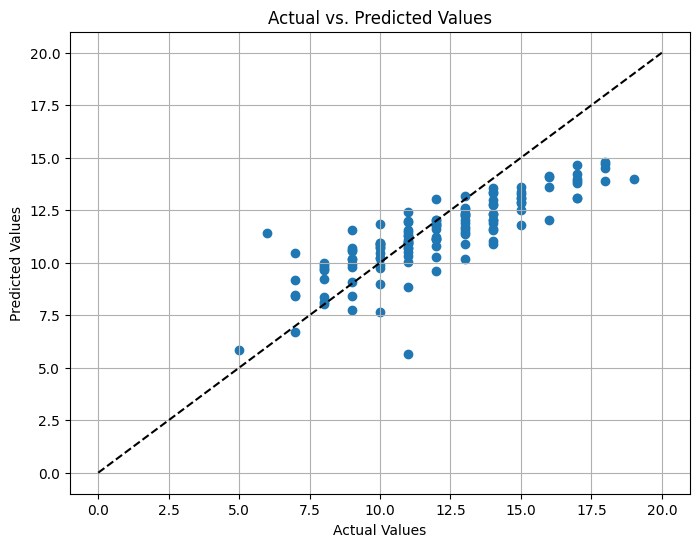

Mean Squared Error: 3.4942


In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network model for linear regression
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Linear layer

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_size = X_processed.shape[1]  # Number of features
model = LinearRegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Calculate mean squared error (MSE)
mse = np.mean((predictions - actuals) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


Epoch [1/100], Train Loss: 125.5663, Val Loss: 116.0743
Epoch [2/100], Train Loss: 96.0358, Val Loss: 71.9015
Epoch [3/100], Train Loss: 40.2656, Val Loss: 12.6072
Epoch [4/100], Train Loss: 6.5846, Val Loss: 8.6119
Epoch [5/100], Train Loss: 4.2096, Val Loss: 3.3249
Epoch [6/100], Train Loss: 2.4880, Val Loss: 2.7127


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch [7/100], Train Loss: 1.9632, Val Loss: 2.2717
Epoch [8/100], Train Loss: 1.7057, Val Loss: 2.1240
Epoch [9/100], Train Loss: 1.6342, Val Loss: 2.0089
Epoch [10/100], Train Loss: 1.5662, Val Loss: 1.8904
Epoch [11/100], Train Loss: 1.5271, Val Loss: 1.8580
Epoch [12/100], Train Loss: 1.4953, Val Loss: 1.7949
Epoch [13/100], Train Loss: 1.4686, Val Loss: 1.7509
Epoch [14/100], Train Loss: 1.4254, Val Loss: 1.8053
Epoch [15/100], Train Loss: 1.4273, Val Loss: 1.7372
Epoch [16/100], Train Loss: 1.4074, Val Loss: 1.7373
Epoch [17/100], Train Loss: 1.3816, Val Loss: 1.7426
Epoch [18/100], Train Loss: 1.3647, Val Loss: 1.7335
Epoch [19/100], Train Loss: 1.3548, Val Loss: 1.7483
Epoch [20/100], Train Loss: 1.3353, Val Loss: 1.7598
Epoch [21/100], Train Loss: 1.3185, Val Loss: 1.7647
Epoch [22/100], Train Loss: 1.3123, Val Loss: 1.7798
Epoch [23/100], Train Loss: 1.2868, Val Loss: 1.8079
Epoch [24/100], Train Loss: 1.2686, Val Loss: 1.8010
Epoch [25/100], Train Loss: 1.2626, Val Loss: 1.8

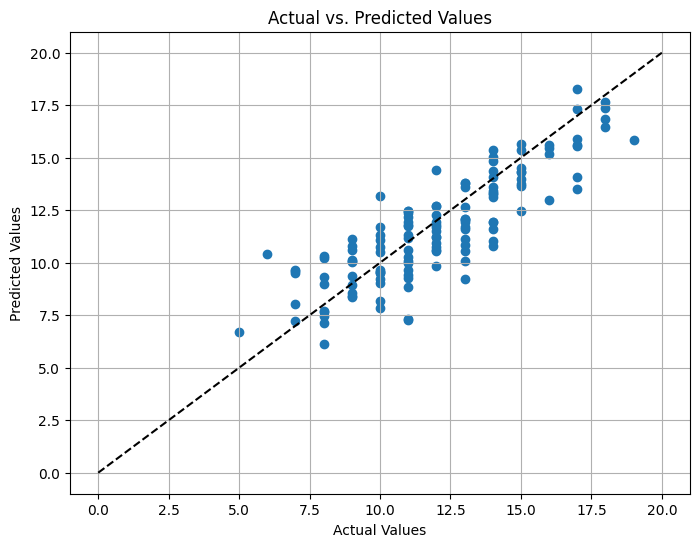

Mean Squared Error: 2.4953


In [137]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"].values  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Preprocessing
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# One-hot encode nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Standardize ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate processed features
X_processed = np.hstack([X_nominal, X_ordinal])

# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Corrected this line

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network model
class DecisionTreeApproximation(nn.Module):
    def __init__(self, input_size):
        super(DecisionTreeApproximation, self).__init__()
        # Approximating Decision Tree with MLP
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model
input_size = X_processed.shape[1]  # Number of features
model = DecisionTreeApproximation(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

# Evaluate the model on the test set
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

# Flatten predictions and actuals for plotting
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Calculate mean squared error (MSE)
mse = np.mean((predictions - actuals) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


Epoch 1/100, Train Loss: 125.0143309373122, Validation Loss: 121.67546272277832
Epoch 2/100, Train Loss: 110.2670399592473, Validation Loss: 99.25304222106934
Epoch 3/100, Train Loss: 77.83995789747972, Validation Loss: 55.212470054626465
Epoch 4/100, Train Loss: 29.98217597374549, Validation Loss: 9.973066329956055
Epoch 5/100, Train Loss: 5.308288794297439, Validation Loss: 6.302339434623718
Epoch 6/100, Train Loss: 4.379532557267409, Validation Loss: 3.1291967034339905


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 7/100, Train Loss: 2.5782863726982703, Validation Loss: 3.0041741132736206
Epoch 8/100, Train Loss: 2.211976876625648, Validation Loss: 2.4089983701705933
Epoch 9/100, Train Loss: 1.9756016639562755, Validation Loss: 2.239296317100525
Epoch 10/100, Train Loss: 1.8213125513150141, Validation Loss: 2.116761952638626
Epoch 11/100, Train Loss: 1.7401480216246386, Validation Loss: 1.9533563554286957
Epoch 12/100, Train Loss: 1.669654791171734, Validation Loss: 1.8809234499931335
Epoch 13/100, Train Loss: 1.6046834221253028, Validation Loss: 1.7985052466392517
Epoch 14/100, Train Loss: 1.567521333694458, Validation Loss: 1.7680302262306213
Epoch 15/100, Train Loss: 1.5328162771004896, Validation Loss: 1.7143567651510239
Epoch 16/100, Train Loss: 1.5012566263859088, Validation Loss: 1.6839151084423065
Epoch 17/100, Train Loss: 1.483891262457921, Validation Loss: 1.66936494410038
Epoch 18/100, Train Loss: 1.4664604938947237, Validation Loss: 1.6434321254491806
Epoch 19/100, Train Loss: 1

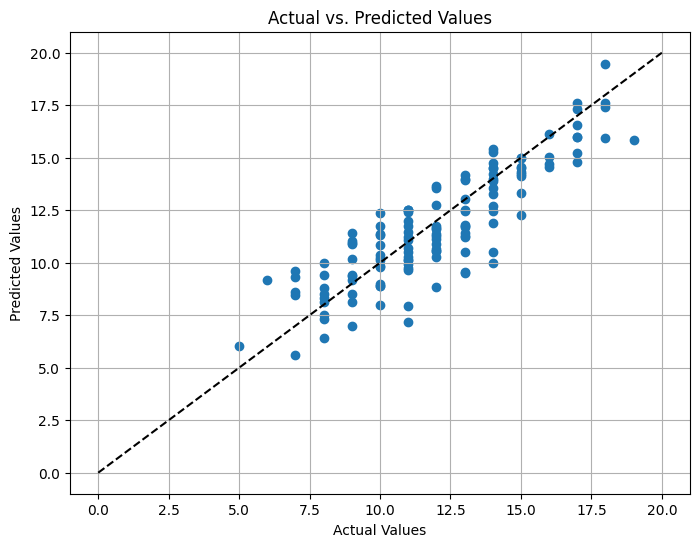

In [138]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Preprocess the data using OneHotEncoder and StandardScaler
# Fit the preprocessors on the training data
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# Apply OneHotEncoder to nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Apply StandardScaler to ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate the processed nominal and ordinal variables
X_processed = np.hstack((X_nominal, X_ordinal))

# Split the processed data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Create the Dataset and DataLoader classes
class StudentDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)  # Remove .values

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
batch_size = 32
train_dataset = StudentDataset(X_train, y_train)
val_dataset = StudentDataset(X_val, y_val)
test_dataset = StudentDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 3: Define the Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = NeuralNet(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs.flatten(), y_batch)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model(X_val_batch)
            val_loss += criterion(val_outputs.flatten(), y_val_batch).item()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}")

# Step 5: Evaluate the model on the test data
model.eval()
test_loss = 0.0
predictions = []
with torch.no_grad():
    for X_test_batch, y_test_batch in test_loader:
        test_outputs = model(X_test_batch)
        predictions.extend(test_outputs.flatten().numpy())
        test_loss += criterion(test_outputs.flatten(), y_test_batch).item()

print("Mean Squared Error on test set:", test_loss / len(test_loader))

# Plot actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100, Train Loss: 134.12417895977313, Validation Loss: 132.4375457763672
Epoch 2/100, Train Loss: 123.98882411076472, Validation Loss: 117.86914443969727
Epoch 3/100, Train Loss: 103.2104269174429, Validation Loss: 88.45205688476562
Epoch 4/100, Train Loss: 65.93503775963417, Validation Loss: 41.94892597198486
Epoch 5/100, Train Loss: 20.896421359135555, Validation Loss: 7.11100697517395
Epoch 6/100, Train Loss: 5.088354495855478, Validation Loss: 5.82241028547287
Epoch 7/100, Train Loss: 3.786933477108295, Validation Loss: 3.211758255958557
Epoch 8/100, Train Loss: 2.5097078268344584, Validation Loss: 2.947845220565796
Epoch 9/100, Train Loss: 2.203510275253883, Validation Loss: 2.461899161338806
Epoch 10/100, Train Loss: 2.020275253515977, Validation Loss: 2.2710235118865967
Epoch 11/100, Train Loss: 1.8735246887573829, Validation Loss: 2.1654727458953857
Epoch 12/100, Train Loss: 1.8007951791469867, Validation Loss: 2.0410135984420776
Epoch 13/100, Train Loss: 1.7155852317810

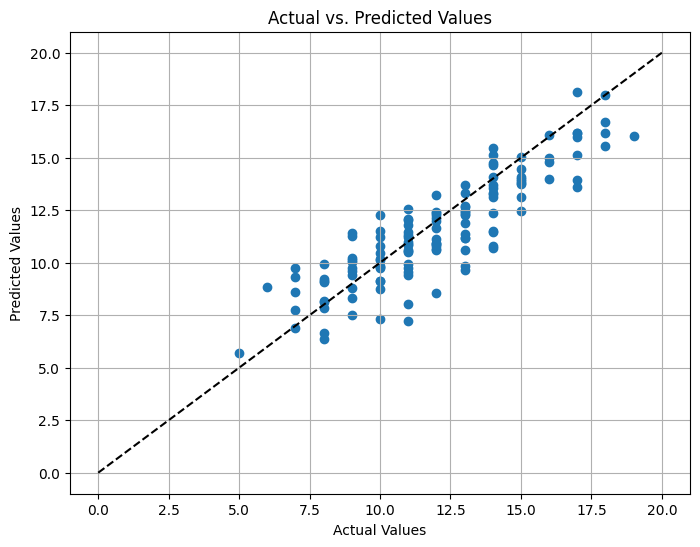

In [139]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Preprocess the data using OneHotEncoder and StandardScaler
# Fit the preprocessors on the training data
onehot_encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# Apply OneHotEncoder to nominal variables
X_nominal = onehot_encoder.fit_transform(X[nominal_vars])

# Apply StandardScaler to ordinal variables
X_ordinal = scaler.fit_transform(X[ordinal_vars])

# Concatenate the processed nominal and ordinal variables
X_processed = np.hstack((X_nominal, X_ordinal))

# Split the processed data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Create the Dataset and DataLoader classes
class StudentDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)  # No need for .values

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
batch_size = 32
train_dataset = StudentDataset(X_train, y_train)
val_dataset = StudentDataset(X_val, y_val)
test_dataset = StudentDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 3: Define the Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = NeuralNet(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs.flatten(), y_batch)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model(X_val_batch)
            val_loss += criterion(val_outputs.flatten(), y_val_batch).item()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}")

# Step 5: Evaluate the model on the test data
model.eval()
test_loss = 0.0
predictions = []
with torch.no_grad():
    for X_test_batch, y_test_batch in test_loader:
        test_outputs = model(X_test_batch)
        predictions.extend(test_outputs.flatten().numpy())
        test_loss += criterion(test_outputs.flatten(), y_test_batch).item()

print("Mean Squared Error on test set:", test_loss / len(test_loader))

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()
